# 数据读取

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%pylab inline

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_df = pd.read_csv('data/data41574/train.csv')
test_df = pd.read_csv('data/data41574/test1.csv')
test_df2 = pd.read_csv('data/data41574/test2.csv')

In [3]:
!head data/data41574/train.csv

In [4]:
train_df.head(5)


,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000,0,0,0,1,NaN,104,6,android,9,18,1438873,1.560000e+12,8,2135019403,0,2329670524,601
1,135939,893,0,0,0,0,1,NaN,19,6,android,8.1,0,1185582,1.560000e+12,4,2782306428,1,2864801071,1000
2,399254,821,0,760,0,360,1,NaN,559,0,android,8.1.0,0,1555716,1.560000e+12,0,1392806005,2,628911675,696
3,68983,1004,46000,2214,0,1080,0,NaN,129,2,android,8.1.0,0,1093419,1.560000e+12,0,3562553457,3,1283809327,753
4,288999,1076,46000,2280,0,1080,1,zh-CN,64,2,android,8.0.0,0,1400089,1.560000e+12,5,2364522023,4,1510695983,582


In [11]:
#把label列移到最后一列
col = train_df.drop('label', axis = 1).columns.tolist() + ['label']
print(col)
print(col[:-1])
train_df = train_df[col]

test_df = test_df[col[:-1]]
test_df.head(3)

['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package', 'sid', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type', 'label']
['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package', 'sid', 'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type']


,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,317625,1181,46000.0,2196.0,2.0,1080.0,CN,639,2.0,Android,8.1.0,188,1440682,1.559872e+12,7,1672223856,57,3872258917,658
1,435108,944,46003.0,2280.0,3.0,1080.0,zh-CN,704,6.0,Android,8.1.0,221,1606824,1.559739e+12,3,3767901757,23,129322164,943
2,0,1106,46000.0,0.0,0.0,0.0,NaN,39,2.0,android,5.1,1562,1774642,1.559614e+12,0,454638703,30,4226678391,411


# 数据分析

## 类型统计

In [6]:
# 数据类型字段统计， label为标签字段
train_df.dtypes

android_id      int64
apptype         int64
carrier         int64
dev_height      int64
dev_ppi         int64
dev_width       int64
lan            object
media_id        int64
ntt             int64
os             object
osv            object
package         int64
sid             int64
timestamp     float64
version        object
fea_hash       object
location        int64
fea1_hash       int64
cus_type        int64
label           int64
dtype: object

In [7]:
train_df.astype(object).describe(include='all')

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type,label
count,500000,500000,500000,500000,500000,500000,316720,500000,500000,500000,493439,500000,500000,5.000000e+05,500000,500000,500000,500000,500000,500000
unique,362258,89,5,798,92,346,21,284,8,2,148,1950,500000,1.000000e+00,17,402980,332,4959,58,2
top,0,1001,46000,0,0,1080,zh-CN,29,2,android,8.1.0,0,1438873,1.560000e+12,0,68083895,48,4190764663,411,0
freq,126686,101248,359409,107014,383291,209914,244474,93978,318597,303175,151419,131906,1,5.000000e+05,292156,110,14932,28393,133055,257760


In [8]:
test_df.astype(object).describe(include='all')

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
count,150000,150000,150000.0,150000.0,150000.0,150000.0,94453,150000,150000.0,150000,148008,150000,150000,1.500000e+05,150000,150000,150000,150000,150000
unique,110483,78,5.0,600.0,58.0,238.0,20,248,7.0,2,130,1293,150000,1.500000e+05,23,135084,332,2159,58
top,0,1001,46000.0,0.0,0.0,1080.0,zh-CN,29,2.0,android,8.1.0,0,1440682,1.559872e+12,0,51306679,48,4190764663,411
freq,38242,30377,107691.0,32199.0,115333.0,63071.0,73046,28188,95538.0,91117,45224,39184,1,1.000000e+00,88113,36,4496,8726,40239


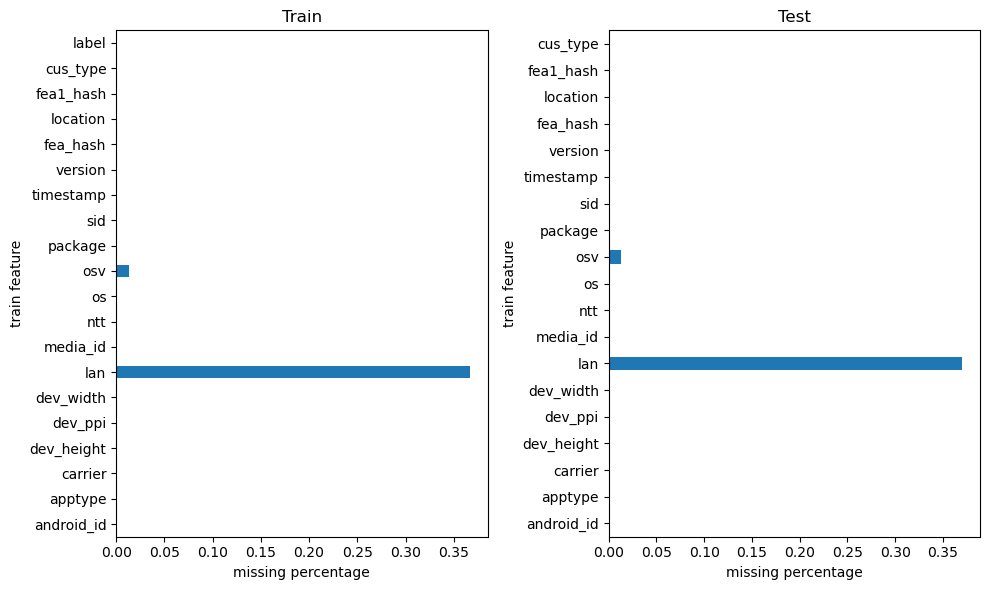

In [12]:
## 缺失值分析
plt.figure(figsize = (10,6))

plt.subplot(121)
train_df.isnull().mean(0).plot(kind = 'barh')
plt.ylabel('train feature')
plt.xlabel('missing percentage')
plt.title('Train')

plt.subplot(122)
test_df.isnull().mean(0).plot(kind = 'barh')
plt.ylabel('train feature')
plt.xlabel('missing percentage')
plt.title('Test')

plt.tight_layout()

## 相关性分析

<AxesSubplot:>

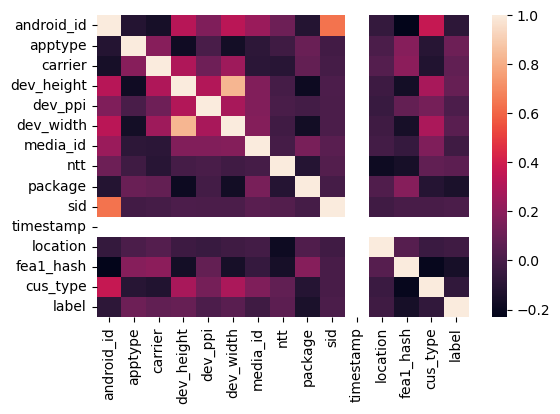

In [13]:
sns.heatmap(train_df.corr())

<AxesSubplot:>

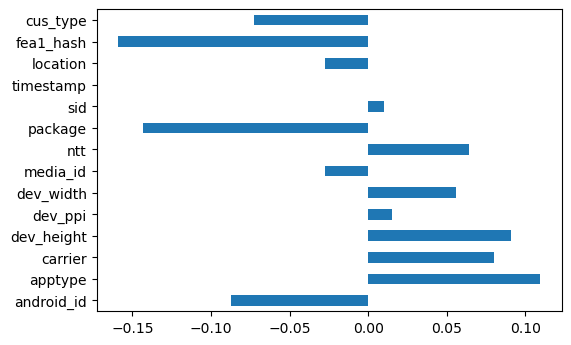

In [14]:
train_df.corr().loc['label'].iloc[:-1].plot(kind = 'barh')

## 探索性分析

In [15]:
train_df.head(3)

,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,lan,media_id,ntt,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type,label
0,316361,1199,46000,0,0,0,NaN,104,6,android,9,18,1438873,1.560000e+12,8,2135019403,0,2329670524,601,1
1,135939,893,0,0,0,0,NaN,19,6,android,8.1,0,1185582,1.560000e+12,4,2782306428,1,2864801071,1000,1
2,399254,821,0,760,0,360,NaN,559,0,android,8.1.0,0,1555716,1.560000e+12,0,1392806005,2,628911675,696,1


In [16]:
train_df.columns

Index(['android_id', 'apptype', 'carrier', 'dev_height', 'dev_ppi',
       'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package', 'sid',
       'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
       'label'],
      dtype='object')

## 类别字段分析

In [20]:
def category_top_label_mean(df, col, target = 'label', topn = 10):
    top_values = df[col].value_counts().index[:topn]
    values_target = df.groupby(col)[target].mean()
    
    values_target.loc[top_values].plot(kind='barh')
    plt.vlines(
        df[target].mean(),
        0, 20, linestyles = 'dashed', colors='red')
    
    plt.title(col)
    plt.tight_layout()

KeyError: 'feal_hash'

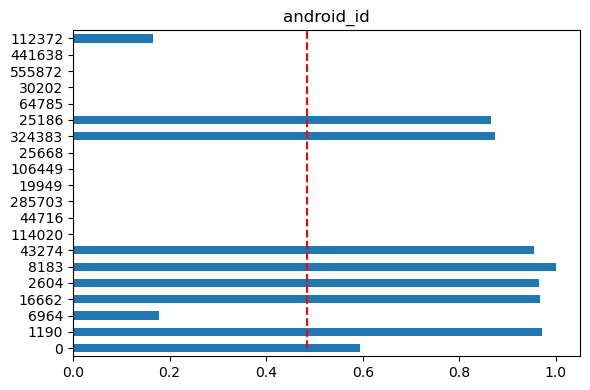

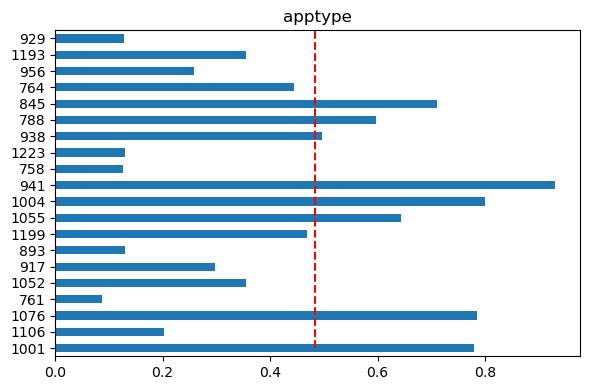

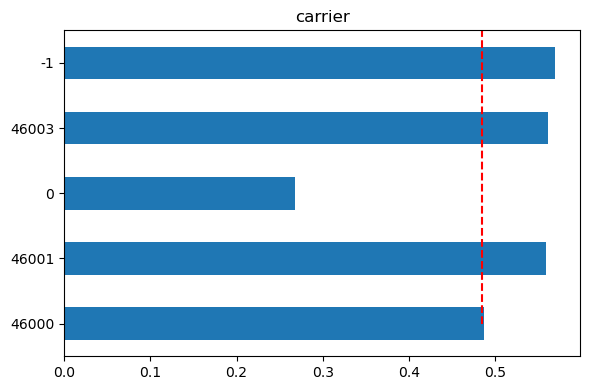

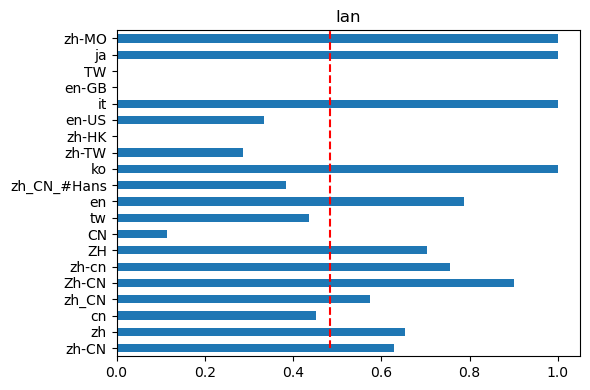

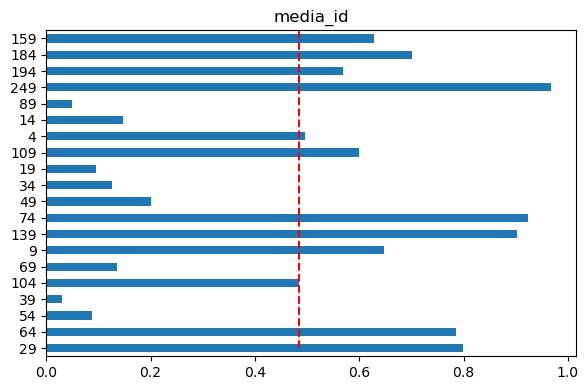

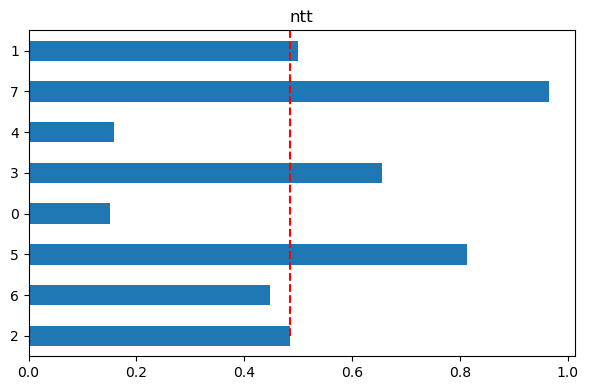

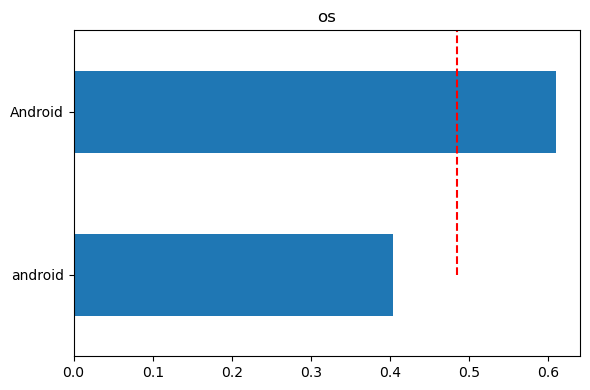

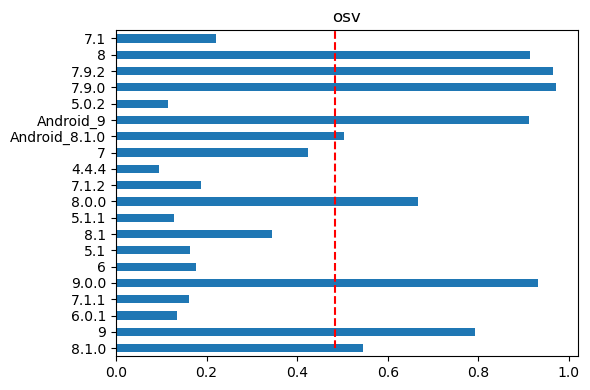

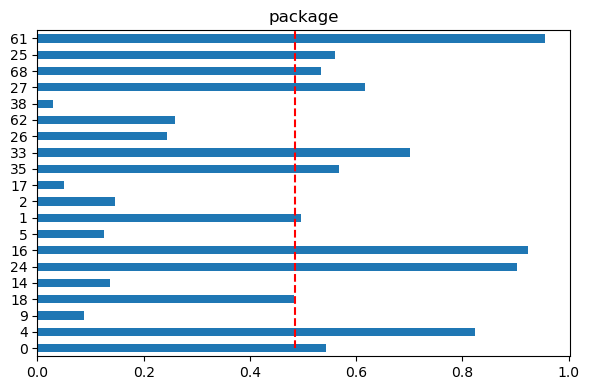

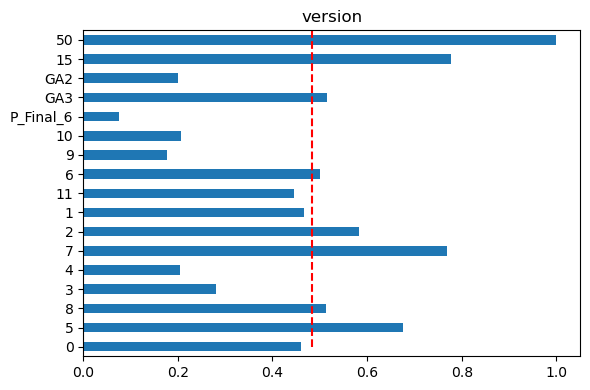

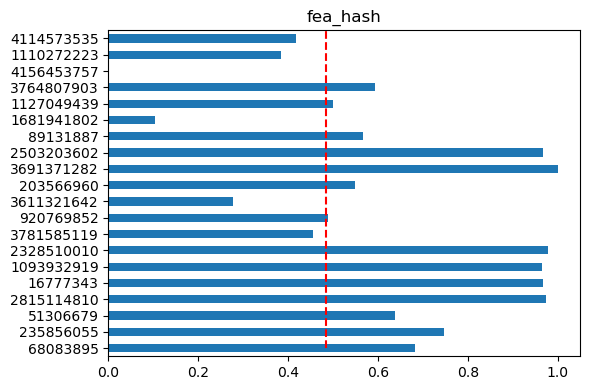

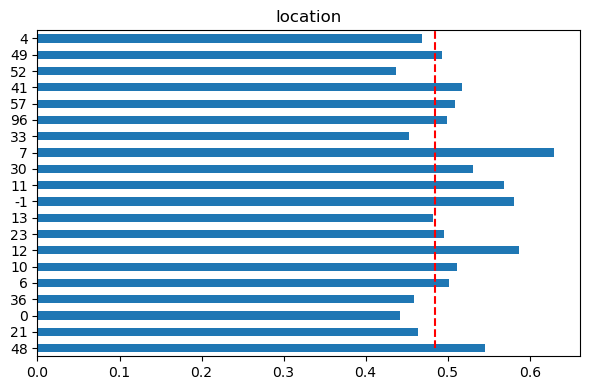

<Figure size 600x400 with 0 Axes>

In [24]:
string_col = ['android_id', 'apptype', 'carrier', 'lan', 'media_id', 'ntt', 'os', 'osv', 'package', 'version', 'fea_hash', 'location', 'feal_hash', 'cus_type']
for col in string_col:
    plt.figure()
    category_top_label_mean(train_df, col, 'label', 20)

## 数值字段分析

In [25]:
train_df['timestamp'] /= 1000

<AxesSubplot:xlabel='label', ylabel='dev_ppi'>

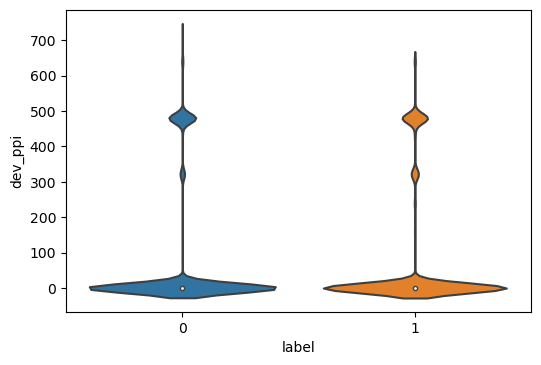

In [26]:
sns.violinplot(y='dev_ppi', data = train_df, x = 'label')

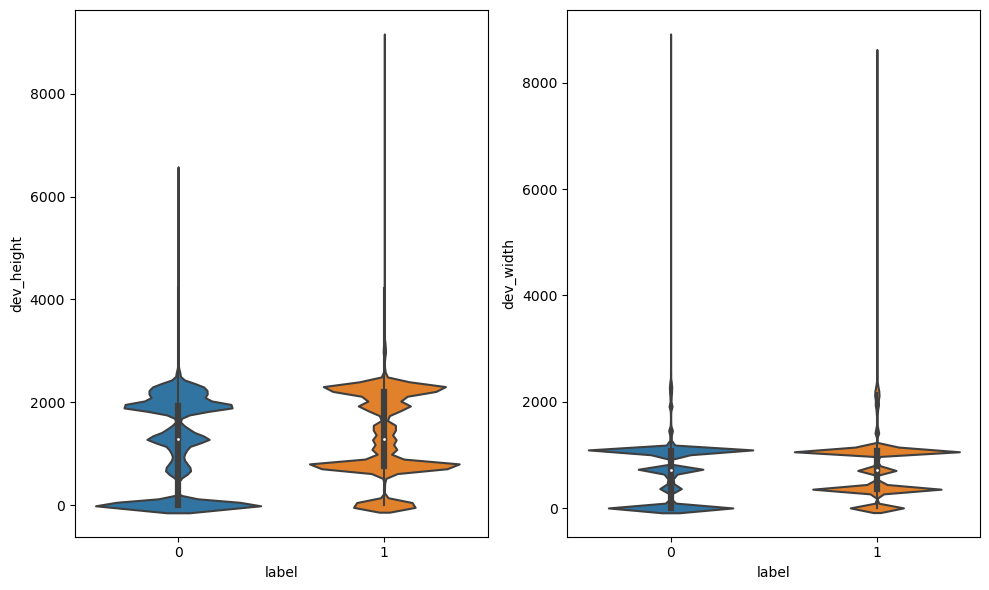

In [27]:
plt.figure(figsize = (10, 6))

plt.subplot(121)
sns.violinplot(y='dev_height', data = train_df, x = 'label')

plt.subplot(122)
sns.violinplot(y='dev_width', data = train_df, x = 'label')

plt.tight_layout()

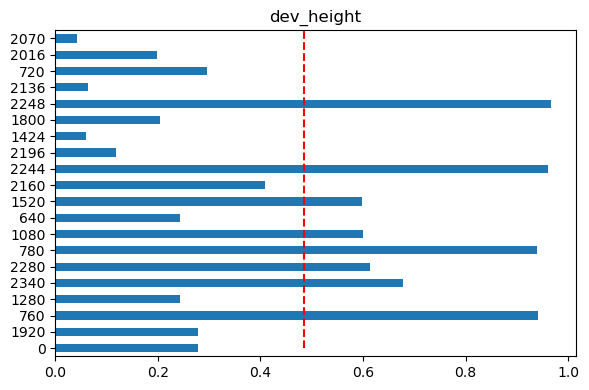

In [28]:
category_top_label_mean(train_df, 'dev_height', 'label', 20)

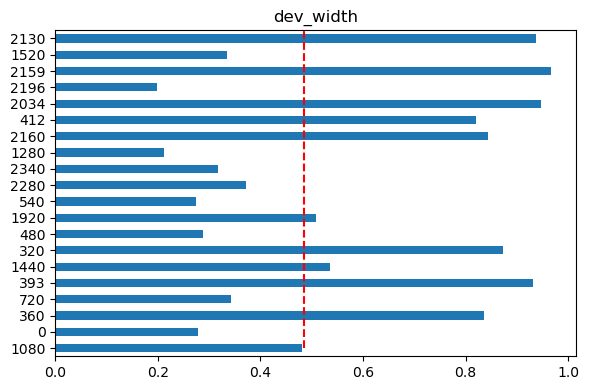

In [30]:
category_top_label_mean(train_df, 'dev_width', 'label', 20)